# Clustering - Introduction

In contrast to *supervised* machine learning, *unsupervised* learning is used when there is no "ground truth" from which to train and validate label predictions. The most common form of unsupervised learning is *clustering*, which is simllar conceptually to *classification*, except that the the training data does not include known values for the class label to be predicted. Clustering works by separating the training cases based on similarities that can be determined from their feature values. Think of it this way; the numeric features of a given entity can be thought of as vector coordinates that define the entity's position in n-dimensional space. What a clustering model seeks to do is to identify groups, or *clusters*, of entities that are close to one another while being separated from other clusters.

For example, let's take a look at a dataset that contains measurements of different species of wheat seed.

> **Citation**: The seeds dataset used in the this exercise was originally published by the Institute of Agrophysics of the Polish Academy of Sciences in Lublin, and can be downloaded from the UCI dataset repository (Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science).

In [1]:
!wget -P data https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv

--2022-10-21 19:26:51--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/seeds.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9386 (9.2K) [text/plain]
Saving to: 'data/seeds.csv'

     0K .........                                             100% 2.49M=0.004s

2022-10-21 19:26:52 (2.49 MB/s) - 'data/seeds.csv' saved [9386/9386]



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
# load the training dataset
data_df = pd.read_csv('data/seeds.csv')

# Display a random sample of 10 observations (just the features)
features_df = data_df[data_df.columns[0:6]]
features_df.sample(10)

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient
18,14.70,14.21,0.9153,5.205,3.466,1.767
19,12.72,13.57,0.8686,5.226,3.049,4.102
105,18.83,16.29,0.8917,6.037,3.786,2.553
38,14.80,14.52,0.8823,5.656,3.288,3.112
135,15.38,14.66,0.8990,5.477,3.465,3.600
115,19.06,16.45,0.8854,6.416,3.719,2.248
87,18.98,16.66,0.8590,6.549,3.670,3.691
121,18.14,16.12,0.8772,6.059,3.563,3.619
179,12.21,13.47,0.8453,5.357,2.893,1.661
140,13.07,13.92,0.8480,5.472,2.994,5.304


As you can see, the dataset contains six data points (or *features*) for each instance (*observation*) of a seed. So you could interpret these as coordinates that describe each instance's location in six-dimensional space.

Now, of course six-dimensional space is difficult to visualise in a three-dimensional world, or on a two-dimensional plot; so we'll take advantage of a mathematical technique called *Principal Component Analysis* (PCA) to analyze the relationships between the features and summarize each observation as coordinates for two principal components - in other words, we'll translate the six-dimensional feature values into two-dimensional coordinates.

In [4]:
# Normalize the numeric features so they're on the same scale
scaled_features_np = MinMaxScaler().fit_transform(features_df[data_df.columns[0:6]])

# Get two principal components
pca_model = PCA(n_components=2).fit(scaled_features_np)
features_2d_np = pca_model.transform(scaled_features_np)
features_2d_np[0:10]

array([[ 0.11883593, -0.09382469],
       [ 0.0696878 , -0.31077233],
       [-0.03499184, -0.37044705],
       [-0.06582089, -0.36365235],
       [ 0.32594892, -0.37695797],
       [-0.02455447, -0.31060184],
       [-0.00769646, -0.07594931],
       [-0.05646955, -0.26696284],
       [ 0.38196305, -0.05149471],
       [ 0.35701044, -0.17697998]])

Now that we have the data points translated to two dimensions, we can visualize them in a plot:

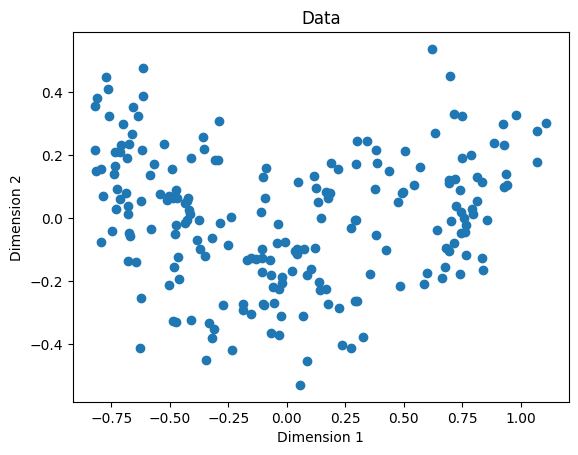

In [5]:
plt.scatter(x=features_2d_np[:,0], y=features_2d_np[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

Hopefully you can see at least two, arguably three, reasonably distinct groups of data points; but here lies one of the fundamental problems with clustering - without known class labels, how do you know how many clusters to separate your data into?

One way we can try to find out is to use a data sample to create a series of clustering models with an incrementing number of clusters, and measure how tightly the data points are grouped within each cluster. A metric often used to measure this tightness is the *within cluster sum of squares* (WCSS), with lower values meaning that the data points are closer. You can then plot the WCSS for each model.

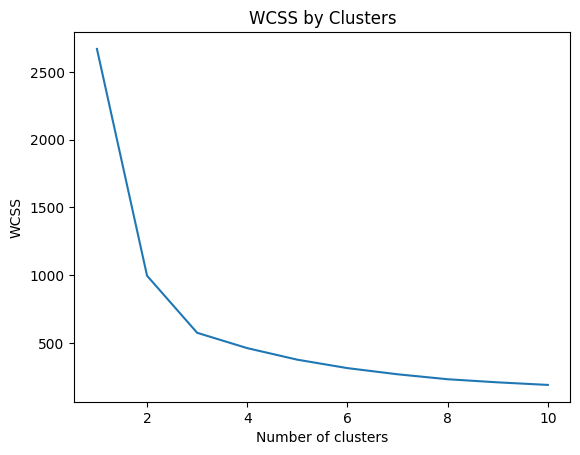

In [6]:
# Create 10 models with 1 to 10 clusters
wcss_ls = []
for i in range(1, 11):
    kmeans_model = KMeans(n_clusters=i)
    # Fit the data points
    kmeans_model.fit(features_df.values)
    # Get the WCSS (inertia) value
    wcss_ls.append(kmeans_model.inertia_)
    
# Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss_ls)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The plot shows a large reduction in WCSS (so greater *tightness*) as the number of clusters increases from one to two, and a further noticable reduction from two to three clusters. After that, the reduction is less pronounced, resulting in an "elbow" in the chart at around three clusters. This is a good indication that there are two to three reasonably well separated clusters of data points.

## Summary

Here we looked at what clustering means, and how to determine whether clustering might be appropriate for your data. In the next notebook, we will look at two ways of 
labelling the data automatically.